<a href="https://colab.research.google.com/github/ware-pooja/Stegnography/blob/main/ca2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**A. Data Preparation & Understanding (Pandas)**

In [ ]:
import pandas as pd
df = pd.read_csv("/content/fraud detect.csv")
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,21-06-2020 12:14,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,19-03-1968,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,21-06-2020 12:14,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",17-01-1990,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,21-06-2020 12:14,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",21-10-1970,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,21-06-2020 12:15,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,25-07-1987,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,21-06-2020 12:15,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,06-07-1955,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


2. Display total rows and columns

In [ ]:
print("Rows:", df.shape[0])
print("Columns:", df.shape[1])

Rows: 1359
Columns: 23


3. Show column names with data types

In [ ]:
df.dtypes

,0
Unnamed: 0,int64
trans_date_trans_time,object
cc_num,float64
merchant,object
category,object
amt,float64
first,object
last,object
gender,object
street,object


4. Convert trans_date_trans_time to datetime


In [ ]:
df['trans_date_trans_time'] = pd.to_datetime(
    df['trans_date_trans_time'],
    format="%d-%m-%Y %H:%M"
)

  5. Convert dob to datetime

In [ ]:
df['dob'] = pd.to_datetime(df['dob'], errors='coerce')

/tmp/ipython-input-3581917294.py:1: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df['dob'] = pd.to_datetime(df['dob'], errors='coerce')


6. Check missing values

In [ ]:
df.isnull().sum()

,0
Unnamed: 0,0
trans_date_trans_time,0
cc_num,0
merchant,0
category,0
amt,0
first,0
last,0
gender,0
street,0


7. Rename columns to lowercase snake_case

In [ ]:
df.columns = (
     df.columns
    .str.strip()
    .str.lower()
    .str.replace(" ", "_")
)


8. Convert is_fraud to boolean

In [ ]:
df['is_fraud'] = df['is_fraud'].astype(bool)


9. Create customer_age

In [ ]:
df['customer_age'] = (
    (df['trans_date_trans_time'] - df['dob'])
    .dt.days // 365
)


10. Create transaction_hour

In [ ]:
df['transaction_hour'] = df['trans_date_trans_time'].dt.hour


**B. Filtering & Conditional Selection (Pandas)**

11. Transactions where amt > 100


In [ ]:
amt_gt_100 = df[df['amt'] > 100]
amt_gt_100.head()


,unnamed:_0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,customer_age,transaction_hour
6,6,2020-06-21 12:15:00,2.130000e+14,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,False,69,12
30,30,2020-06-21 12:25:00,3.800000e+14,fraud_Kautzer and Sons,personal_care,176.23,Frank,Key,M,5537 Jessica Plaza,...,3263,Stage manager,1930-02-28,3f5587dd43e45910ba221bc3a4dfdd3f,1371817509,38.585316,-86.108185,False,90,12
31,31,2020-06-21 12:26:00,1.800000e+14,fraud_Ernser-Feest,home,134.39,Mary,Wall,F,2481 Mills Lock,...,71485,Leisure centre manager,1974-07-19,bc7699cb759a26aa5dd58d4124febf8d,1371817570,40.196876,-74.407686,False,45,12
33,33,2020-06-21 12:26:00,1.800000e+14,fraud_Nienow PLC,entertainment,210.36,Mackenzie,Salazar,F,982 Melissa Lock,...,878,Risk analyst,1974-11-20,902facfd912019350d63a3539990638e,1371817583,42.736666,-90.099710,False,45,12
37,37,2020-06-21 12:27:00,5.020000e+11,fraud_Hoppe-Parisian,kids_pets,134.60,Jessica,Dominguez,F,06393 Nancy Parkways Suite 855,...,67082,Ceramics designer,1970-01-08,cc3733b9ecedc1a7b0053bd0647cdaaa,1371817642,34.727266,-86.883794,False,50,12


12. Fraudulent transactions

In [ ]:
fraud_txns = df[df['is_fraud'] == True]
fraud_txns.head()


,unnamed:_0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,customer_age,transaction_hour
337,337,2020-06-21 14:07:00,4.650000e+18,"fraud_Bradtke, Torp and Bahringer",personal_care,91.47,Julia,Bell,F,576 House Crossroad,...,4056,Film/video editor,1990-06-25,93e21a4d479f3bdba8bd2773d24a9347,1371823648,40.129112,-72.766756,True,30,14
1230,1685,2020-06-21 22:06:00,3.560730e+15,fraud_Hamill-D'Amore,health_fitness,24.84,Brooke,Smith,F,63542 Luna Brook Apt. 012,...,23,Cytogeneticist,1969-09-15,16bf2e46c54369a8eab2214649506425,1371852399,32.575873,-102.604290,True,50,22
1231,1767,2020-06-21 22:32:00,6.564460e+15,"fraud_Rodriguez, Yost and Jenkins",misc_net,780.52,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,1306,Public relations officer,1958-09-10,ab4b379d2c0c9c667d46508d4e126d72,1371853942,42.461127,-91.147148,True,61,22
1232,1781,2020-06-21 22:37:00,6.564460e+15,fraud_Nienow PLC,entertainment,620.33,Douglas,Willis,M,619 Jeremy Garden Apt. 681,...,1306,Public relations officer,1958-09-10,47a9987ae81d99f7832a54b29a77bf4b,1371854247,42.771834,-90.158365,True,61,22
1233,1784,2020-06-21 22:38:00,4.005680e+15,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1077.69,William,Perry,M,458 Phillips Island Apt. 768,...,71335,Herbalist,1994-05-31,fe956c7e4a253c437c18918bf96f7b62,1371854335,31.204974,-90.261595,True,26,22


13. Gas_transport category

In [ ]:
gas_transport_txns = df[df['category'] == 'gas_transport']
gas_transport_txns.head()


,unnamed:_0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,customer_age,transaction_hour
1256,10206,2020-06-24 03:33:00,1.800990e+14,fraud_Huels-Hahn,gas_transport,7.82,Dennis,Davidson,M,08469 Trujillo Forge,...,7728,"Scientist, research (maths)",1959-03-30,75ecf87a722ea6a87d1d0dbb72919412,1372044820,41.864069,-79.633384,True,61,3
1274,14386,2020-06-26 05:56:00,2.131610e+14,"fraud_Schaefer, Maggio and Daugherty",gas_transport,8.32,Alyssa,Morgan,F,622 Robin Run Suite 764,...,67082,Physiological scientist,1963-02-09,01bbbf7a906610fe6f4fd20c7d4ca99a,1372226213,33.277530,-86.362105,True,57,5
1283,16326,2020-06-27 00:42:00,3.573390e+15,"fraud_Stroman, Hudson and Erdman",gas_transport,18.25,Stephanie,Murphy,F,526 Stacy Walks,...,63,Systems developer,1969-10-30,2e8c9135069fbe6f5aa93a8fa2ac655f,1372293738,44.744951,-98.214561,True,50,0
1284,16365,2020-06-27 01:14:00,6.544730e+15,fraud_Koss and Sons,gas_transport,11.82,John,Myers,M,701 Wilson Divide,...,23727,Community arts worker,1982-02-08,bbcd797cf07dcba83d609ee6a5b79f6f,1372295665,41.554511,-87.016728,True,38,1
1325,26194,2020-06-30 00:03:00,3.586010e+15,fraud_Schmitt Inc,gas_transport,9.78,Crystal,Fuller,F,000 Jennifer Mills,...,50489,Osteopath,1984-02-29,82ba6ca203d06e79c6b4acf1bddcc869,1372550636,46.832982,-121.160406,True,36,0


14. Female customers

In [ ]:
female_txns = df[df['gender'] == 'F']
female_txns.head()


,unnamed:_0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,customer_age,transaction_hour
1,1,2020-06-21 12:14:00,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,False,30,12
2,2,2020-06-21 12:14:00,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,False,49,12
5,5,2020-06-21 12:15:00,3.040000e+13,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,False,28,12
6,6,2020-06-21 12:15:00,2.130000e+14,fraud_Romaguera Ltd,health_fitness,133.93,Kayla,Sutton,F,010 Weaver Land,...,1139,"Therapist, occupational",1951-01-15,17003d7ce534440eadb10c4750e020e5,1371816944,41.499458,-124.888729,False,69,12
7,7,2020-06-21 12:15:00,3.590000e+15,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,False,48,12


15. State VA

In [ ]:
va_txns = df[df['state'] == 'VA']
va_txns.head()


,unnamed:_0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,customer_age,transaction_hour
97,97,2020-06-21 12:44:00,6.010000e+15,fraud_Lynch Ltd,shopping_pos,1.01,Valerie,Davis,F,3861 Anderson Ramp Apt. 536,...,1970,Energy engineer,1985-09-02,b1376da15c587d540fe1fce58e3f7592,1371818652,37.901707,-79.523650,False,34,12
164,164,2020-06-21 13:07:00,6.010000e+15,fraud_Medhurst PLC,shopping_net,118.21,Valerie,Davis,F,3861 Anderson Ramp Apt. 536,...,1970,Energy engineer,1985-09-02,0a4e8eb858470184696ba2026a105361,1371820075,36.466740,-78.785534,False,34,13
166,166,2020-06-21 13:08:00,4.100000e+15,fraud_Quitzon-Goyette,home,16.02,James,Stephens,M,1166 Castillo Mountains,...,9815,"Designer, ceramics/pottery",1975-07-07,95b28c98c518e783969e6faeef2817d2,1371820121,38.897742,-79.366165,False,44,13
291,291,2020-06-21 13:52:00,3.780000e+14,"fraud_Denesik, Powlowski and Pouros",home,80.28,Christopher,Matthews,M,433 John Heights Apt. 849,...,395,Senior tax professional/tax inspector,1982-01-07,3a137f9fe02ab498a4f95200a565e80d,1371822754,39.187674,-77.779086,False,38,13
297,297,2020-06-21 13:56:00,3.030000e+13,"fraud_Bahringer, Bergnaum and Quitzon",home,20.72,Sarah,Foster,F,77872 Andrea Glen Apt. 543,...,1051,Chief Operating Officer,1976-11-21,e260449afface1ef68b79bb793d38680,1371822960,37.860126,-77.776199,False,43,13


16. City_pop < 1000

In [ ]:
low_pop_txns = df[df['city_pop'] < 1000]
low_pop_txns.head()


,unnamed:_0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,customer_age,transaction_hour
1,1,2020-06-21 12:14:00,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,False,30,12
5,5,2020-06-21 12:15:00,3.040000e+13,fraud_Daugherty LLC,kids_pets,19.55,Danielle,Evans,F,76752 David Lodge Apt. 064,...,520,Psychotherapist,1991-10-13,798db04aaceb4febd084f1a7c404da93,1371816937,41.747157,-77.584197,False,28,12
7,7,2020-06-21 12:15:00,3.590000e+15,fraud_Reichel LLC,personal_care,10.37,Paula,Estrada,F,350 Stacy Glens,...,343,"Development worker, international aid",1972-03-05,8be473af4f05fc6146ea55ace73e7ca2,1371816950,44.495498,-97.728453,False,48,12
9,9,2020-06-21 12:16:00,3.550000e+15,fraud_Kilback Group,food_dining,66.54,Kayla,Obrien,F,7921 Robert Port Suite 343,...,263,Barrister,1956-05-30,a7915132c7c4240996ba03a47f81e3bd,1371816971,31.782919,-96.366185,False,64,12
10,10,2020-06-21 12:16:00,2.240000e+15,"fraud_Feil, Hilpert and Koss",food_dining,7.01,Samuel,Jenkins,M,43235 Mckenzie Views Apt. 837,...,564,Pensions consultant,1996-04-10,3b8e4d02d9e1a3bf97cf449eb0317f2c,1371816980,38.977546,-84.727994,False,24,12


17. Category starts with 'grocery'

In [ ]:
grocery_txns = df[df['category'].str.startswith('grocery')]
grocery_txns.head()


,unnamed:_0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,customer_age,transaction_hour
294,294,2020-06-21 13:55:00,6.010000e+15,fraud_Vandervort-Funk,grocery_pos,88.94,Victoria,Fleming,F,2807 Parker Station Suite 080,...,2607,"Lecturer, further education",1995-12-04,7da554c2698cfcce2675d0dba5e7c9a7,1371822954,44.996837,-93.055743,False,24,13
776,776,2020-06-21 16:38:00,4.360000e+15,fraud_Murray-Smitham,grocery_pos,56.35,Gary,Martinez,M,03512 Jackson Ports,...,276896,Immunologist,1997-03-12,094b10b237398457cabf7cba2db0e9f7,1371832734,40.250270,-120.148107,False,23,16
845,845,2020-06-21 17:04:00,3.550000e+15,"fraud_Schoen, Kuphal and Nitzsche",grocery_pos,42.36,Keith,Sanders,M,8030 Beck Motorway,...,2870,Chartered public finance accountant,1999-03-05,850b3ef27b617d3ed308a6b78efeff5a,1371834282,34.380994,-91.371524,False,21,17
1215,1215,2020-06-21 19:07:00,4.650000e+15,"fraud_Mosciski, Gislason and Mertz",grocery_pos,51.56,Monica,Tucker,F,302 Christina Islands,...,6841,"Therapist, sports",1999-06-06,0b3ef894856ac61d8727074ebf67ac5e,1371841670,36.602320,-87.056849,False,21,19
1242,2195,2020-06-22 01:25:00,4.005680e+15,"fraud_Goldner, Kovacek and Abbott",grocery_pos,326.94,William,Perry,M,458 Phillips Island Apt. 768,...,71335,Herbalist,1994-05-31,219c46c355f98b732d9a36818c5b8a88,1371864313,29.784597,-90.671894,True,26,1


18. After 01-01-2019 00:03

In [ ]:
after_time_txns = df[
    df['trans_date_trans_time'] > pd.Timestamp("2019-01-01 00:03")
]
after_time_txns.head()


,unnamed:_0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,customer_age,transaction_hour
0,0,2020-06-21 12:14:00,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,False,52,12
1,1,2020-06-21 12:14:00,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,False,30,12
2,2,2020-06-21 12:14:00,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,False,49,12
3,3,2020-06-21 12:15:00,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,False,32,12
4,4,2020-06-21 12:15:00,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,False,65,12


**C. Sorting & Ranking**

19. Sort by amt descending

In [ ]:
df_sorted_amt_desc = df.sort_values(by='amt', ascending=False)
df_sorted_amt_desc.head()


,unnamed:_0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,customer_age,transaction_hour
951,951,2020-06-21 17:40:00,4.290000e+18,"fraud_Haley, Jewess and Bechtelar",shopping_pos,3204.98,Michael,Williams,M,35822 Clayton Street Apt. 679,...,5927,Art therapist,1973-06-09,cdb7839b9b57c1bd8f856c3166b0e9db,1371836454,37.480372,-77.349580,False,47,17
999,999,2020-06-21 17:55:00,4.930000e+15,fraud_Kessler Group,travel,2068.05,Richard,Carter,M,5097 Martin Ridges,...,1022298,Chemical engineer,1976-09-29,904e99f9a81c33371549da1ed53ac282,1371837333,44.444997,-93.515788,False,43,17
428,428,2020-06-21 14:38:00,3.850000e+13,fraud_Metz-Boehm,shopping_pos,1881.53,Laura,Johns,F,95835 Garcia Rue,...,530,Animal technologist,1989-05-14,4c4841f79d838ed6fe2c9a0f23bfbc50,1371825489,34.709044,-82.585103,False,31,14
167,167,2020-06-21 13:08:00,6.010000e+15,fraud_Schumm PLC,shopping_net,1199.45,Rebecca,Erickson,F,594 Berry Lights Apt. 392,...,186140,English as a second language teacher,1983-02-08,249ecb7b44d6d42a8eb155833fe23c53,1371820126,34.622777,-77.827863,False,37,13
1302,22015,2020-06-28 23:48:00,3.581130e+15,"fraud_Heathcote, Yost and Kertzmann",shopping_net,1197.26,Gregory,Wood,M,622 Robert Summit,...,272134,Call centre manager,1964-03-15,041e573c99f5f86a5110a99a2227d976,1372463331,40.199599,-81.108596,True,56,23


20. Sort by transaction time

In [ ]:
df_sorted_time = df.sort_values(by='trans_date_trans_time')
df_sorted_time.head()


,unnamed:_0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,customer_age,transaction_hour
0,0,2020-06-21 12:14:00,2.290000e+15,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,False,52,12
1,1,2020-06-21 12:14:00,3.570000e+15,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,False,30,12
2,2,2020-06-21 12:14:00,3.600000e+15,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,False,49,12
3,3,2020-06-21 12:15:00,3.590000e+15,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,False,32,12
4,4,2020-06-21 12:15:00,3.530000e+15,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,False,65,12


21. Top 5 highest amounts

In [ ]:
top_5_transactions = df.sort_values(by='amt', ascending=False).head(5)
top_5_transactions[['amt', 'merchant', 'category']]


,amt,merchant,category
951,3204.98,"fraud_Haley, Jewess and Bechtelar",shopping_pos
999,2068.05,fraud_Kessler Group,travel
428,1881.53,fraud_Metz-Boehm,shopping_pos
167,1199.45,fraud_Schumm PLC,shopping_net
1302,1197.26,"fraud_Heathcote, Yost and Kertzmann",shopping_net


22. Sort by city_pop ascending

In [ ]:
df_sorted_city_pop = df.sort_values(by='city_pop', ascending=True)
df_sorted_city_pop[['first', 'last', 'city', 'city_pop']].head()


,first,last,city,city_pop
1230,Brooke,Smith,Notrees,23
1234,Brooke,Smith,Notrees,23
109,Monique,Martin,Ratcliff,43
907,Monique,Martin,Ratcliff,43
911,Sabrina,Johnson,Thompson,46


23. Rank transactions by amount

In [ ]:
df['amt_rank'] = df['amt'].rank(ascending=False)
df[['amt', 'amt_rank']].head()


,amt,amt_rank
0,2.86,1300.0
1,29.84,746.0
2,41.28,647.0
3,60.05,507.0
4,3.19,1279.0


**D. Aggregation Operations**

24. Average transaction amount

In [ ]:
avg_amt = df['amt'].mean()
avg_amt


np.float64(108.91231052244298)

25. Max and min transaction amount

In [ ]:
max_amt = df['amt'].max()
min_amt = df['amt'].min()

max_amt, min_amt


(3204.98, 1.01)

26. Total transaction amount

In [ ]:
total_amt = df['amt'].sum()
total_amt


np.float64(148011.83000000002)

27. Count fraudulent vs non-fraudulent

In [ ]:
df['is_fraud'].value_counts().rename({True: 'Fraud', False: 'Non-Fraud'})


,count
is_fraud,
Non-Fraud,1229
Fraud,130


28. Average city population


In [ ]:
avg_city_pop = df['city_pop'].mean()
avg_city_pop


np.float64(109259.50110375276)

**E. Grouping & Grouped Aggregation**

29. Average amt by category

In [ ]:
avg_amt_by_category = df.groupby('category')['amt'].mean()
avg_amt_by_category

,amt
category,
entertainment,84.956261
food_dining,48.862222
gas_transport,11.838571
grocery_net,13.250000
grocery_pos,284.260909
health_fitness,54.461212
home,61.439950
kids_pets,53.772151
misc_net,514.625000


30. Transaction count by gender


In [ ]:
df.groupby('gender')['trans_num'].count()

,trans_num
gender,
F,765
M,594


31. Total amt by state

In [ ]:
total_amt_by_state = df.groupby('state')['amt'].sum()
total_amt_by_state


,amt
state,
AL,8813.53
AR,8492.82
AZ,2305.79
CA,2911.16
CO,1336.82
CT,81.28
DC,104.34
FL,4706.50
GA,1444.04


32. Average amt by job

In [ ]:
avg_amt_by_job = df.groupby('job')['amt'].mean()
avg_amt_by_job

,amt
job,
Academic librarian,30.290000
"Accountant, chartered certified",141.453333
"Accountant, chartered public finance",67.386667
Accounting technician,43.600000
Administrator,34.630000
...,...
Waste management officer,4.500000
Water engineer,55.612500
Water quality scientist,552.460000


33. Transaction count by city

In [ ]:
txn_count_by_city = df.groupby('city').size()
txn_count_by_city

,0
city,
Achille,2
Acworth,3
Afton,2
Akron,9
Albany,1
...,...
Winthrop,1
Wittenberg,2
Woodville,3


34. Average amt by is_fraud

In [ ]:
avg_amt_by_fraud = df.groupby('is_fraud')['amt'].mean()
avg_amt_by_fraud


,amt
is_fraud,
False,62.078625
True,551.670769


35. Category with highest average amt

In [ ]:
highest_avg_category = df.groupby('category')['amt'].mean().idxmax()
highest_avg_category


'misc_net'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 1. Load your data
df = pd.read_csv('/content/fraud detect.csv')
print(f"Dataset: {df.shape}, Fraud cases: {df['is_fraud'].sum()}")


Dataset: (1359, 23), Fraud cases: 130


In [ ]:
# 2. Feature Engineering
df['trans_hour'] = pd.to_datetime(df['trans_date_trans_time']).dt.hour
df['trans_distance'] = np.sqrt((df['lat'] - df['merch_lat'])**2 + (df['long'] - df['merch_long'])**2)


In [ ]:
# 3. Drop non-numeric columns & encode rest
df_numeric = df.select_dtypes(include=[np.number]).drop(['unix_time', 'cc_num'], axis=1, errors='ignore')
df_numeric['is_fraud'] = df['is_fraud']


In [ ]:
# 5. Split data
X = df_numeric.drop('is_fraud', axis=1)
y = df_numeric['is_fraud']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
print(f"Train: {y_train.value_counts().to_dict()}")
print(f"Test: {y_test.value_counts().to_dict()}")

Train: {0: 860, 1: 91}
Test: {0: 369, 1: 39}


In [ ]:
# 6. Scale & Train
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(class_weight='balanced', random_state=42, max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [ ]:
# 7. Results
y_pred = model.predict(X_test)
print("\nRESULTS:")
print(classification_report(y_test, y_pred))
print(f"ROC AUC: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.3f}")



RESULTS:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       369
           1       1.00      0.92      0.96        39

    accuracy                           0.99       408
   macro avg       1.00      0.96      0.98       408
weighted avg       0.99      0.99      0.99       408

ROC AUC: 0.985


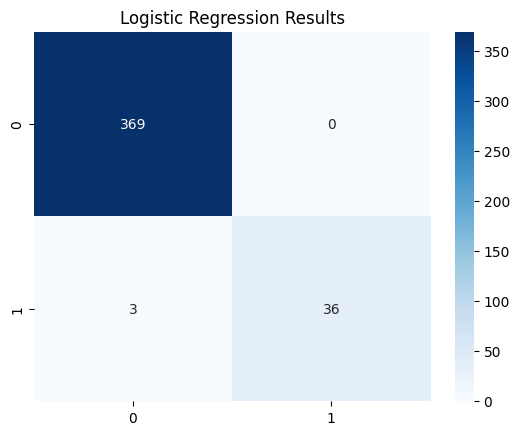

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Results')
plt.show()